# Spring 2025 Data Science Project: Berlin Marathon Analysis

## Team Members and Contributions

Ben Talesnik & Zach Hiner

### Contributions:
For each team member, list their contributions across the following categories:
- A: Project idea
- B: Dataset Curation and Preprocessing
- C: Data Exploration and Summary Statistics
- D: ML Algorithm Design/Development
- E: ML Algorithm Training and Test Data Analysis
- F: Visualization, Result Analysis, Conclusion
- G: Final Tutorial Report Creation
- H: Additional

[Add specific contributions for each team member here]

## 1. Introduction

This project analyzes Berlin Marathon results from 1999 to 2019, one of the world's most prestigious marathon events. Through this analysis, we aim to:
1. Has the average time to finish the marathon decreased over time?
2. How has the number of participants changed over time?
3. What is the relationship between the average time to finish the marathon and the number of participants?
4. How has the average time to finish the marathon changed over time for different age groups?
5. How has the average time to finish the marathon changed over time for different genders?
6. How has the average time to finish the marathon changed over time for different countries?

Understanding these patterns is important because it can help us understand how the sport of marathon running has evolved over time. It demonstrates the impact of technology, training, and other factors on marathon performance. With the introduction of carbon plated shoes, new fitness tests, and other factors, it is important to understand how these changes have affected the sport.

## 2. Data Curation and Preprocessing

### Data Source

Marathon finisher results from the Berlin marathon between 1999 and 
2019. Miller, Andrew, Marathon Results, (2021), GitHub Repository,  
https://github.com/AndrewMillerOnline/marathon-results


### Initial Data Overview

The dataset contains information about the runners, their times, and other details from a few of the world's most prestigious marathons. We have chosen to focus on the Berlin Marathon due to the completeness of the dataset. The dataset includes information including:

- Place
- Name
- Nationality
- Club
- Time
- Gender
- Splits for 5k, 10k, 15k, 20k, 25k, 30k, 35k, 40k
- Year

This dataset is useful for our analysis because it contains a large amount of information about the runners, including their times, gender, nationality, and club.



In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Set style for all visualizations
sns.set_palette('husl')
plt.style.use("seaborn-v0_8")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

### Data Loading and Preprocessing

The dataset overall is very clean and does not require much preprocessing. With the initial import, we're focusing on ensuring the current years are imported (1999-2019). With each year added to the dataframe, a year column is created to keep track of the year of the marathon.

In [3]:
START_YEAR = 1999
END_YEAR = 2019

# Create a list of dataframes
dfs = []
for year in range(START_YEAR, END_YEAR + 1):
    df = pd.read_csv(f'./data/results-{year}.csv')
    df['year'] = year
    dfs.append(df)

# Concatenate all dataframes
results = pd.concat(dfs, ignore_index=True)

# Drop rows with missing values, even though we know there are none
results = results.dropna()
display(results)

,place_overall,first_name,last_name,nationality,club,time_full,gender,split_5k,split_10k,split_15k,split_20k,time_half,split_25k,split_30k,split_35k,split_40k,Race,year
0,1,Josephat,Kiprono,KEN,Kenia,02:06:44,M,00:15:09,00:30:21,00:45:25,01:00:34,01:03:54,01:14:54,01:30:10,01:45:05,02:00:08,Berlin,1999
1,2,Takayuki,Inubushi,JPN,Japan,02:06:57,M,00:15:09,00:30:21,00:45:27,01:00:36,01:03:54,01:14:56,01:30:18,01:45:21,02:00:18,Berlin,1999
2,3,Samson,Kandie,KEN,Kenia,02:08:31,M,00:15:10,00:30:21,00:45:27,01:00:35,01:03:54,01:14:55,01:30:18,01:45:59,02:01:41,Berlin,1999
3,4,Hicham,Chatt,MAR,Marokko,02:09:56,M,00:15:11,00:30:23,00:45:27,01:00:36,01:03:55,01:14:56,01:30:24,01:46:14,02:02:52,Berlin,1999
4,5,Henry,Cherono,KEN,Kenia,02:10:37,M,00:15:10,00:30:21,00:00:00,01:00:35,01:03:55,01:14:55,01:30:18,01:46:14,02:02:58,Berlin,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678702,30739,Wolfgang,Biedermann,GER,"SC . LT SAD ,Spiridon",07:12:30,M,00:39:11,01:26:52,02:15:21,03:09:25,03:22:13,04:06:45,05:04:06,05:56:57,06:49:33,Berlin,2019
678705,13243,Elvira,Ernst,GER,261 Fearless,07:14:44,W,00:46:10,01:34:15,02:23:21,03:12:21,03:22:44,04:02:34,04:56:52,05:50:44,06:48:44,Berlin,2019
678706,30740,Gert,Kleinschmidt,GER,Dessauer SV 97,07:15:28,M,00:49:05,01:42:38,02:38:02,03:27:30,03:37:40,04:16:57,05:09:49,06:01:58,06:54:25,Berlin,2019
678709,30741,Oscar,Martinez,USA,BRIDERUNNERS,07:19:28,M,00:37:26,01:18:14,02:05:06,02:59:24,03:10:51,03:56:15,04:58:07,06:01:29,06:56:38,Berlin,2019


Now we need to convert the time column to a more usable format. We need to go through each of the time columns and convert them to a datetime object. Each time is converted to minutes for easier analysis.

In [4]:
# Convert time columns to datetime
time_columns = ['time_full', 'split_5k', 'split_10k', 'split_15k', 'split_20k', 
                'time_half', 'split_25k', 'split_30k', 'split_35k', 'split_40k']

for col in time_columns:
    dt = pd.to_datetime(results[col], format='%H:%M:%S')
    results[f'{col}_minutes'] = (
        dt.dt.hour * 60 +
        dt.dt.minute +
        dt.dt.second / 60
    )

## 3. Exploratory Data Analysis

In this section, we'll explore key characteristics of our dataset through summary statistics and visualizations.

### Summary Statistics

In [9]:
# Basic information about the dataset
print("Dataset Shape:", results.shape)
print("\nColumns:", results.columns.tolist())
print("\nData Types:\n", results.dtypes)
print("\nMissing Values:\n", results.isnull().sum())
print("\nMean:", results['time_full_minutes'].mean())
print("\nMedian:", results['time_full_minutes'].median())

Dataset Shape: (290390, 28)

Columns: ['place_overall', 'first_name', 'last_name', 'nationality', 'club', 'time_full', 'gender', 'split_5k', 'split_10k', 'split_15k', 'split_20k', 'time_half', 'split_25k', 'split_30k', 'split_35k', 'split_40k', 'Race', 'year', 'time_full_minutes', 'split_5k_minutes', 'split_10k_minutes', 'split_15k_minutes', 'split_20k_minutes', 'time_half_minutes', 'split_25k_minutes', 'split_30k_minutes', 'split_35k_minutes', 'split_40k_minutes']

Data Types:
 place_overall          int64
first_name            object
last_name             object
nationality           object
club                  object
                      ...   
time_half_minutes    float64
split_25k_minutes    float64
split_30k_minutes    float64
split_35k_minutes    float64
split_40k_minutes    float64
Length: 28, dtype: object

Missing Values:
 place_overall        0
first_name           0
last_name            0
nationality          0
club                 0
                    ..
time_half_minut

As we can see, the dataset is very clean and does not require much preprocessing due to the fact that there are no missing values. You can also see the columns that are time columns and have been converted to minutes while preserving the original time format.

The mean and median are very close, which indicates that the dataset is not skewed. The average time to finish the marathon is 241.47 minutes (4 hours and 1 minute), with a median of 237.23 minutes (3 hours and 57 minutes).

## 4. Primary Analysis

Based on our exploratory analysis, we have chosen to look at a few different aspects of the dataset. We will be looking at the distribution of finish times, the gender distribution, and the correlation between splits.

With further statistical analysis, we will look at the gender performance difference, year-over-year performance trends, and a pace analysis.

### Distribution of Finish Times

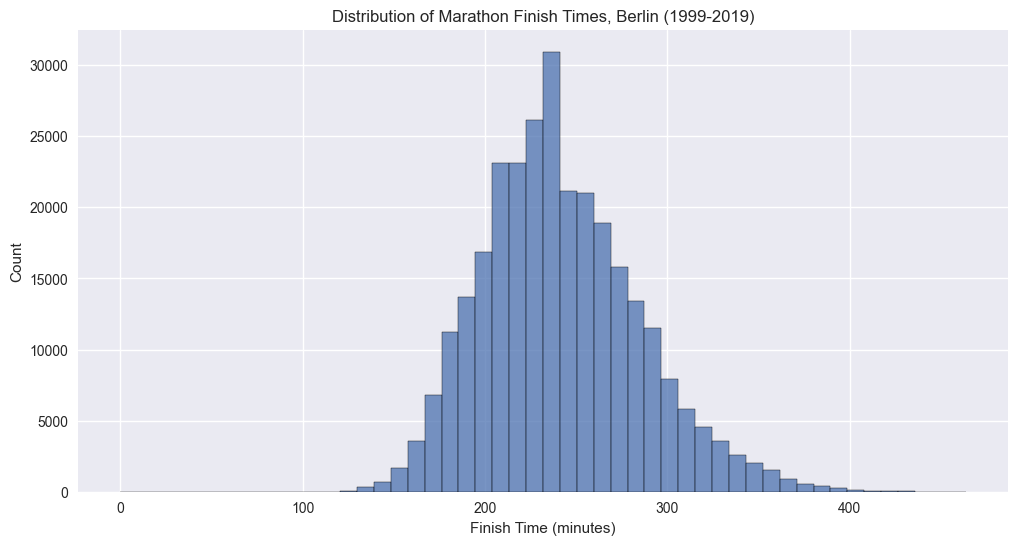

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=results, x='time_full_minutes', bins=50)
plt.title('Distribution of Marathon Finish Times, Berlin (1999-2019)')
plt.xlabel('Finish Time (minutes)')
plt.ylabel('Count')
plt.show()

This distribution of Marathon Finish Times from the Berlin Marathon 1999-2019 is right-skewed. It shows the mean of the distribution is around 4 hours. Elite runners finish quickly around 2 to 2.5 hours, creating a sharp peak at the left end. A smaller group takes 6+ hours due to exhaustion, injuries, or walking, forming the right tail.

### Gender Distribution

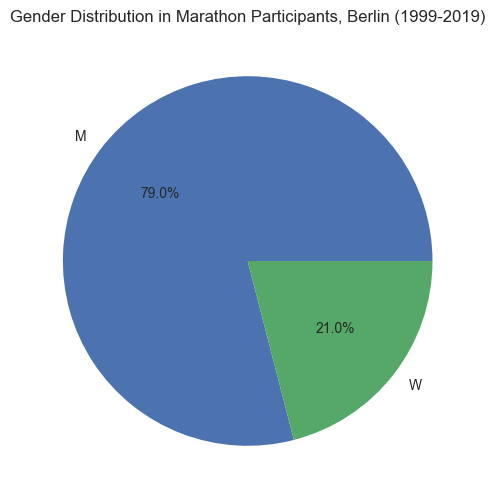

In [11]:
gender_counts = results['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution in Marathon Participants, Berlin (1999-2019)')
plt.show()

The gender distribution shows that there are way more male participants than female participants. Between 1999 and 2019, 79% of participants were male while only 21% were female.

### Correlation Between Splits

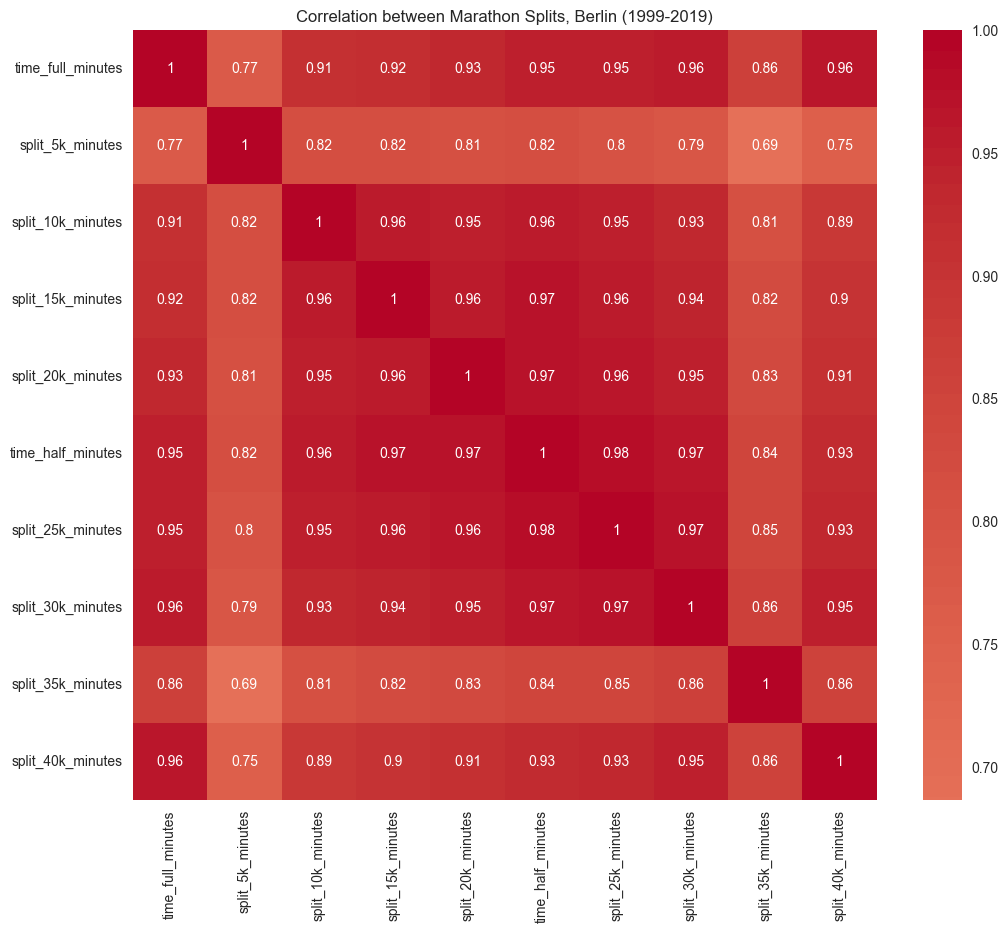

In [12]:
split_columns = [col for col in results.columns if 'minutes' in col]
correlation_matrix = results[split_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Marathon Splits, Berlin (1999-2019)')
plt.show()

The correlation heatmap shows a strong positive relationship between marathon split times, meaning runners who start fast tend to maintain their pace. Earlier splits are highly correlated, while later splits show slightly weaker correlations due to fatigue or pacing strategies. Elite runners likely have the strongest correlations, as they maintain consistent pacing. Overall, the heatmap highlights the predictable relationship between split times and overall marathon performance.

### Statistical Analysis 1: Gender Performance Difference

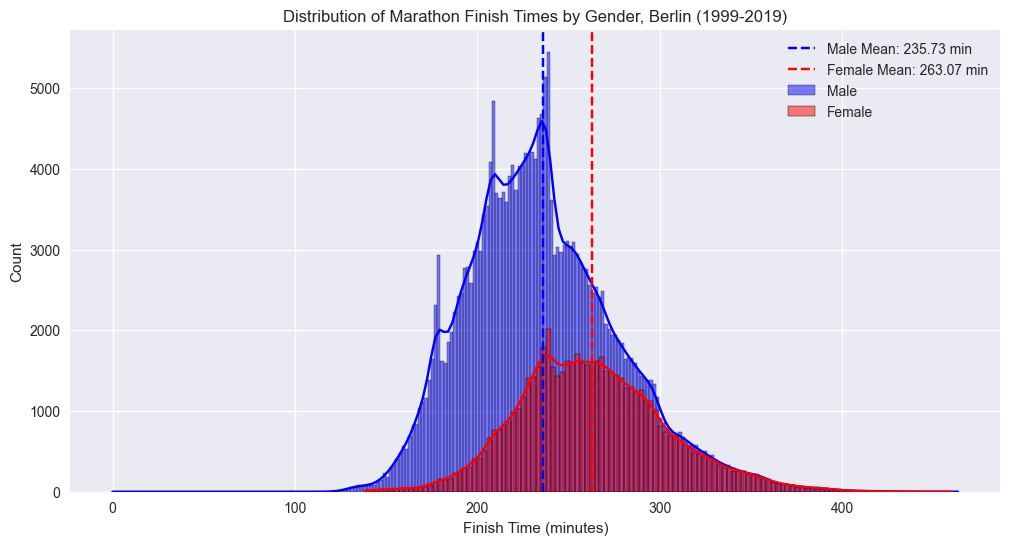


Statistical Analysis 1: Gender Performance Difference
Male Mean: 235.73 minutes
Female Mean: 263.07 minutes
Difference: 27.33 minutes
Male Median: 232.02 minutes
Female Median: 260.12 minutes
T-statistic: -146.8814
P-value: 0.0000


In [15]:
# Compare finish times between genders
male_times = results[results['gender'] == 'M']['time_full_minutes']
female_times = results[results['gender'] == 'W']['time_full_minutes']

# Calculate basic statistics
male_mean = male_times.mean()
female_mean = female_times.mean()
male_median = male_times.median()
female_median = female_times.median()

# Perform t-test to check if the difference is statistically significant
t_stat, pvalue = stats.ttest_ind(male_times, female_times, equal_var=False)

# Visualize the distributions with a histogram
plt.figure(figsize=(12, 6))
sns.histplot(male_times, color='blue', alpha=0.5, label='Male', kde=True)
sns.histplot(female_times, color='red', alpha=0.5, label='Female', kde=True)
plt.axvline(male_mean, color='blue', linestyle='--', label=f'Male Mean: {male_mean:.2f} min')
plt.axvline(female_mean, color='red', linestyle='--', label=f'Female Mean: {female_mean:.2f} min')
plt.title('Distribution of Marathon Finish Times by Gender, Berlin (1999-2019)')
plt.xlabel('Finish Time (minutes)')
plt.ylabel('Count')
plt.legend()
plt.show()

print("\nStatistical Analysis 1: Gender Performance Difference")
print(f"Male Mean: {male_mean:.2f} minutes")
print(f"Female Mean: {female_mean:.2f} minutes")
print(f"Difference: {abs(male_mean - female_mean):.2f} minutes")
print(f"Male Median: {male_median:.2f} minutes")
print(f"Female Median: {female_median:.2f} minutes")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {pvalue:.4f}")

This statistical analysis shows a significant gender performance difference in marathon times, with males finishing faster on average. The mean male finish time is 235.73 minutes, while the female mean is 263.07 minutes, a 27.33 minute gap. The medians follow a similar pattern, reinforcing the trend. The extremely low p-value (0.0000) and large negative t-statistic (-146.88) indicate that this difference is highly statistically significant, meaning it is unlikely due to chance.

### Statistical Analysis 2: Year-over-Year Performance Trend

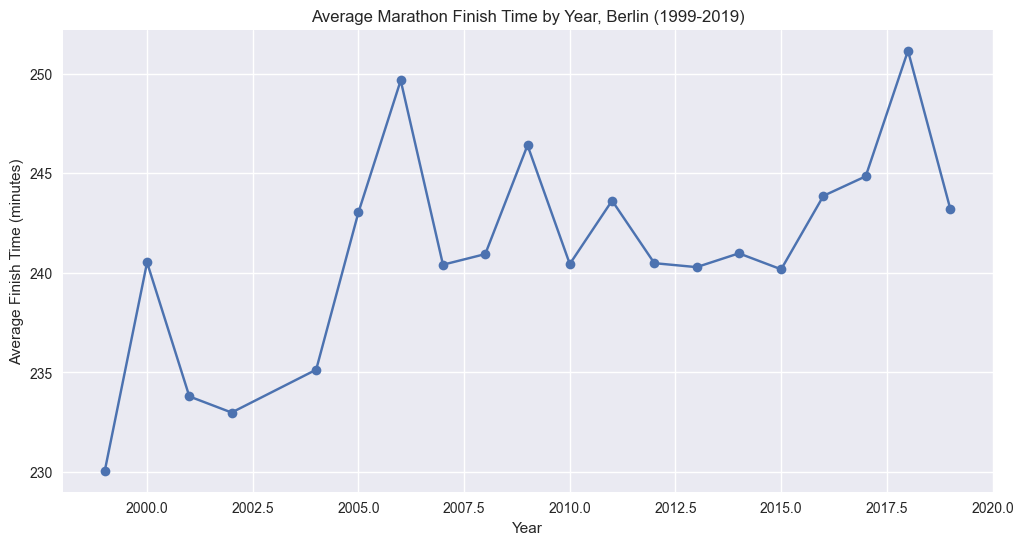


Statistical Analysis 2: Year-over-Year Performance Trend
Slope: 0.5229
R-squared: 0.3860
P-value: 0.0035


In [16]:
yearly_means = results.groupby('year')['time_full_minutes'].mean()

# Visualize the trend with a line plot
plt.figure(figsize=(12, 6))
yearly_means.plot(kind='line', marker='o')
plt.title('Average Marathon Finish Time by Year, Berlin (1999-2019)')
plt.xlabel('Year')
plt.ylabel('Average Finish Time (minutes)')
plt.grid(True)
plt.show()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(yearly_means.index, yearly_means.values)

print("\nStatistical Analysis 2: Year-over-Year Performance Trend")
print(f"Slope: {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

This analysis examines the year-over-year trend in marathon finish times from 1999 to 2019. The positive slope (0.5229) suggests that average finish times have been gradually increasing, meaning runners are taking slightly longer to complete the marathon over time. We think this may be due to growth in marathon popularity as more casual runners and first-timers are participating, which could be pulling the average finish time higher. The R-squared value (0.3860) indicates a moderate correlation, meaning other factors also influence performance. The low p-value (0.0035) confirms that the trend is statistically significant and unlikely due to random chance. This suggests possible influences like changes in race conditions, participation demographics, or training methods over the years.

### Statistical Analysis 3: Pace Analysis

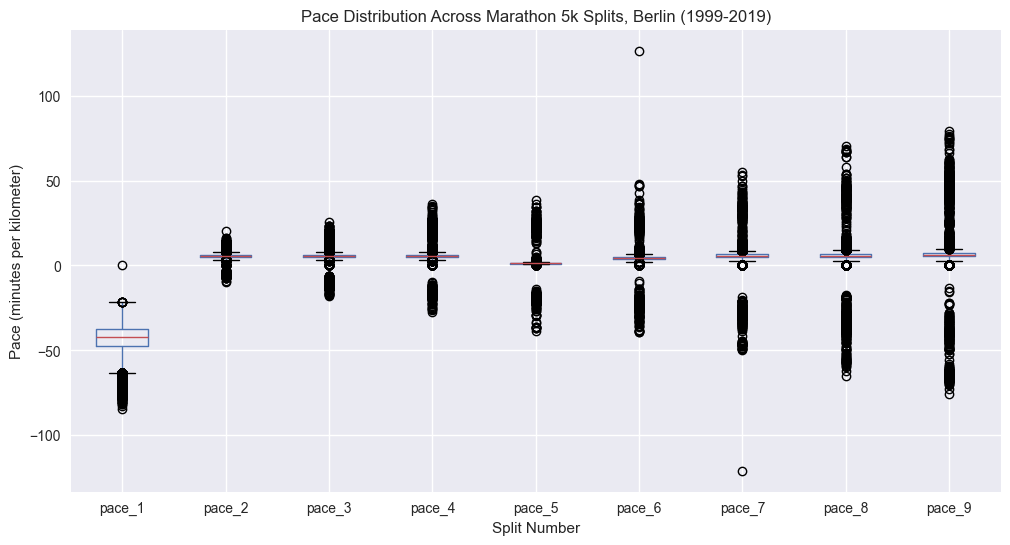


Statistical Analysis 3: Pace Analysis
F-statistic: 6325419.9672
P-value: 0.0000


In [17]:
# Calculate pace (minutes per kilometer) for each split
for i in range(1, len(split_columns)):
    split_distance = 5  # Each split is 5km
    results[f'pace_{i}'] = (results[split_columns[i]] - results[split_columns[i-1]]) / split_distance

# Box plot of pace distribution across splits
plt.figure(figsize=(12, 6))
pace_columns = [col for col in results.columns if 'pace_' in col]
results[pace_columns].boxplot()
plt.title('Pace Distribution Across Marathon 5k Splits, Berlin (1999-2019)')
plt.xlabel('Split Number')
plt.ylabel('Pace (minutes per kilometer)')
plt.show()

# Perform ANOVA test for pace differences across splits
pace_data = [results[col].dropna() for col in pace_columns]
f_stat, p_value = stats.f_oneway(*pace_data)

print("\nStatistical Analysis 3: Pace Analysis")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

This analysis explores the pace distribution across different 5k splits of the marathon from 1999 to 2019. By calculating the pace for each split, it provides insight into how runners' speeds change throughout the race. The box plot visually displays the distribution of paces across splits, showing that runners start faster and gradually slow down, especially as fatigue sets in. The ANOVA test results with an F-statistic of 6325419.9672 and a p-value of 0.0000 confirms that there are significant differences in pace across the splits. This suggests that runners generally run faster in the earlier splits and slow down in the later ones, which is typical in endurance races such as marathons due to factors like fatigue, pacing strategy, and race conditions. The very low p-value indicates that these differences in pace are statistically significant and not due to random chance.

## 5. Visualization and Results

Here we present the key findings from our analysis through carefully designed visualizations.

In [7]:
# Your visualization code here

## 6. Insights and Conclusions

Our analysis of the Berlin Marathon data from 1999 to 2019 has revealed several key insights:

1. [Key finding 1]
2. [Key finding 2]
3. [Key finding 3]

### Limitations and Future Work

While our analysis provides valuable insights, there are some limitations to consider:

1. [Limitation 1]
2. [Limitation 2]

Future work could address these limitations by:

1. [Future direction 1]
2. [Future direction 2]

### References

1. [Your references here]